# EEG/MEG data processing with mne-python

MNE-python is a python environment for:
* Loading EEG/MEG data from various data formats.
* Explore, visualize and analyze datasets.
* Scripting philosophy.

https://mne.tools/stable/index.html

In particular installation is described in:
https://mne.tools/stable/install/index.html

Numerous tutorials and examples are available.

## Loading MNE-python

In [ ]:
%matplotlib qt
# Magic command to get full display functionality. Alternative %matplotlib inline
import mne # Loading the mne environment
import numpy as np

Eventually check installation

In [12]:
mne.sys_info()

Platform             macOS-13.3-arm64-arm-64bit
Python               3.11.5 | packaged by conda-forge | (main, Aug 27 2023, 03:33:12) [Clang 15.0.7 ]
Executable           /Users/hyelimlee/anaconda3/bin/python
CPU                  arm (8 cores)
Memory               16.0 GB

Core
├☑ mne               1.5.1
├☑ numpy             1.24.3 (OpenBLAS 0.3.21 with 8 threads)
├☑ scipy             1.11.1
├☑ matplotlib        3.7.2 (backend=QtAgg)
├☑ pooch             1.8.0
└☑ jinja2            3.1.2

Numerical (optional)
├☑ sklearn           1.3.0
├☑ numba             0.57.1
├☑ pandas            2.0.3
└☐ unavailable       nibabel, nilearn, dipy, openmeeg, cupy

Visualization (optional)
├☑ qtpy              2.2.0 (PyQt5=5.15.2)
├☑ ipywidgets        8.0.4
└☐ unavailable       pyvista, pyvistaqt, vtk, ipympl, pyqtgraph, mne-qt-browser, trame_client, trame_server, trame_vtk, trame_vuetify

Ecosystem (optional)
└☐ unavailable       mne-bids, mne-nirs, mne-features, mne-connectivity, mne-icalabel, mne-bi

## Data loading

We use a dataset provided on internet.

In [13]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (
    sample_data_folder / "MEG" / "sample" / "sample_audvis_filt-0-40_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file)


Opening raw data file /Users/hyelimlee/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [14]:
# potential is not important, differences of potential is important

Print dataset information

In [15]:
print(raw)
print(raw.info)

#376 meg/eeg sensors, 41700 time channel
# eog is measurement for eye blink
# 204 gradiometers (measuring gradient of MEG), 102 (measuring magnetic of MEG) two diff types of MEG Sensors
# highpass = filter to remove noise.



<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.2 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


Examine data structure.

In [16]:
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_ra

Print channels names

In [17]:
print(raw.ch_names)

['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'ME

## Data visualization

Signal viewer.
Let's play with the parameters.
First have a look at the help (bottom left).
Scroll in time and in channels.
Taggle butterfly mode (b).
Remove noise cancellation to see its effects (bottom right).
Play with average EEG reference (bottom right).
How can we see quasistaticity ?
Look st time t=14.5. What do we see.
Locate bad channels (their names are given in the info).

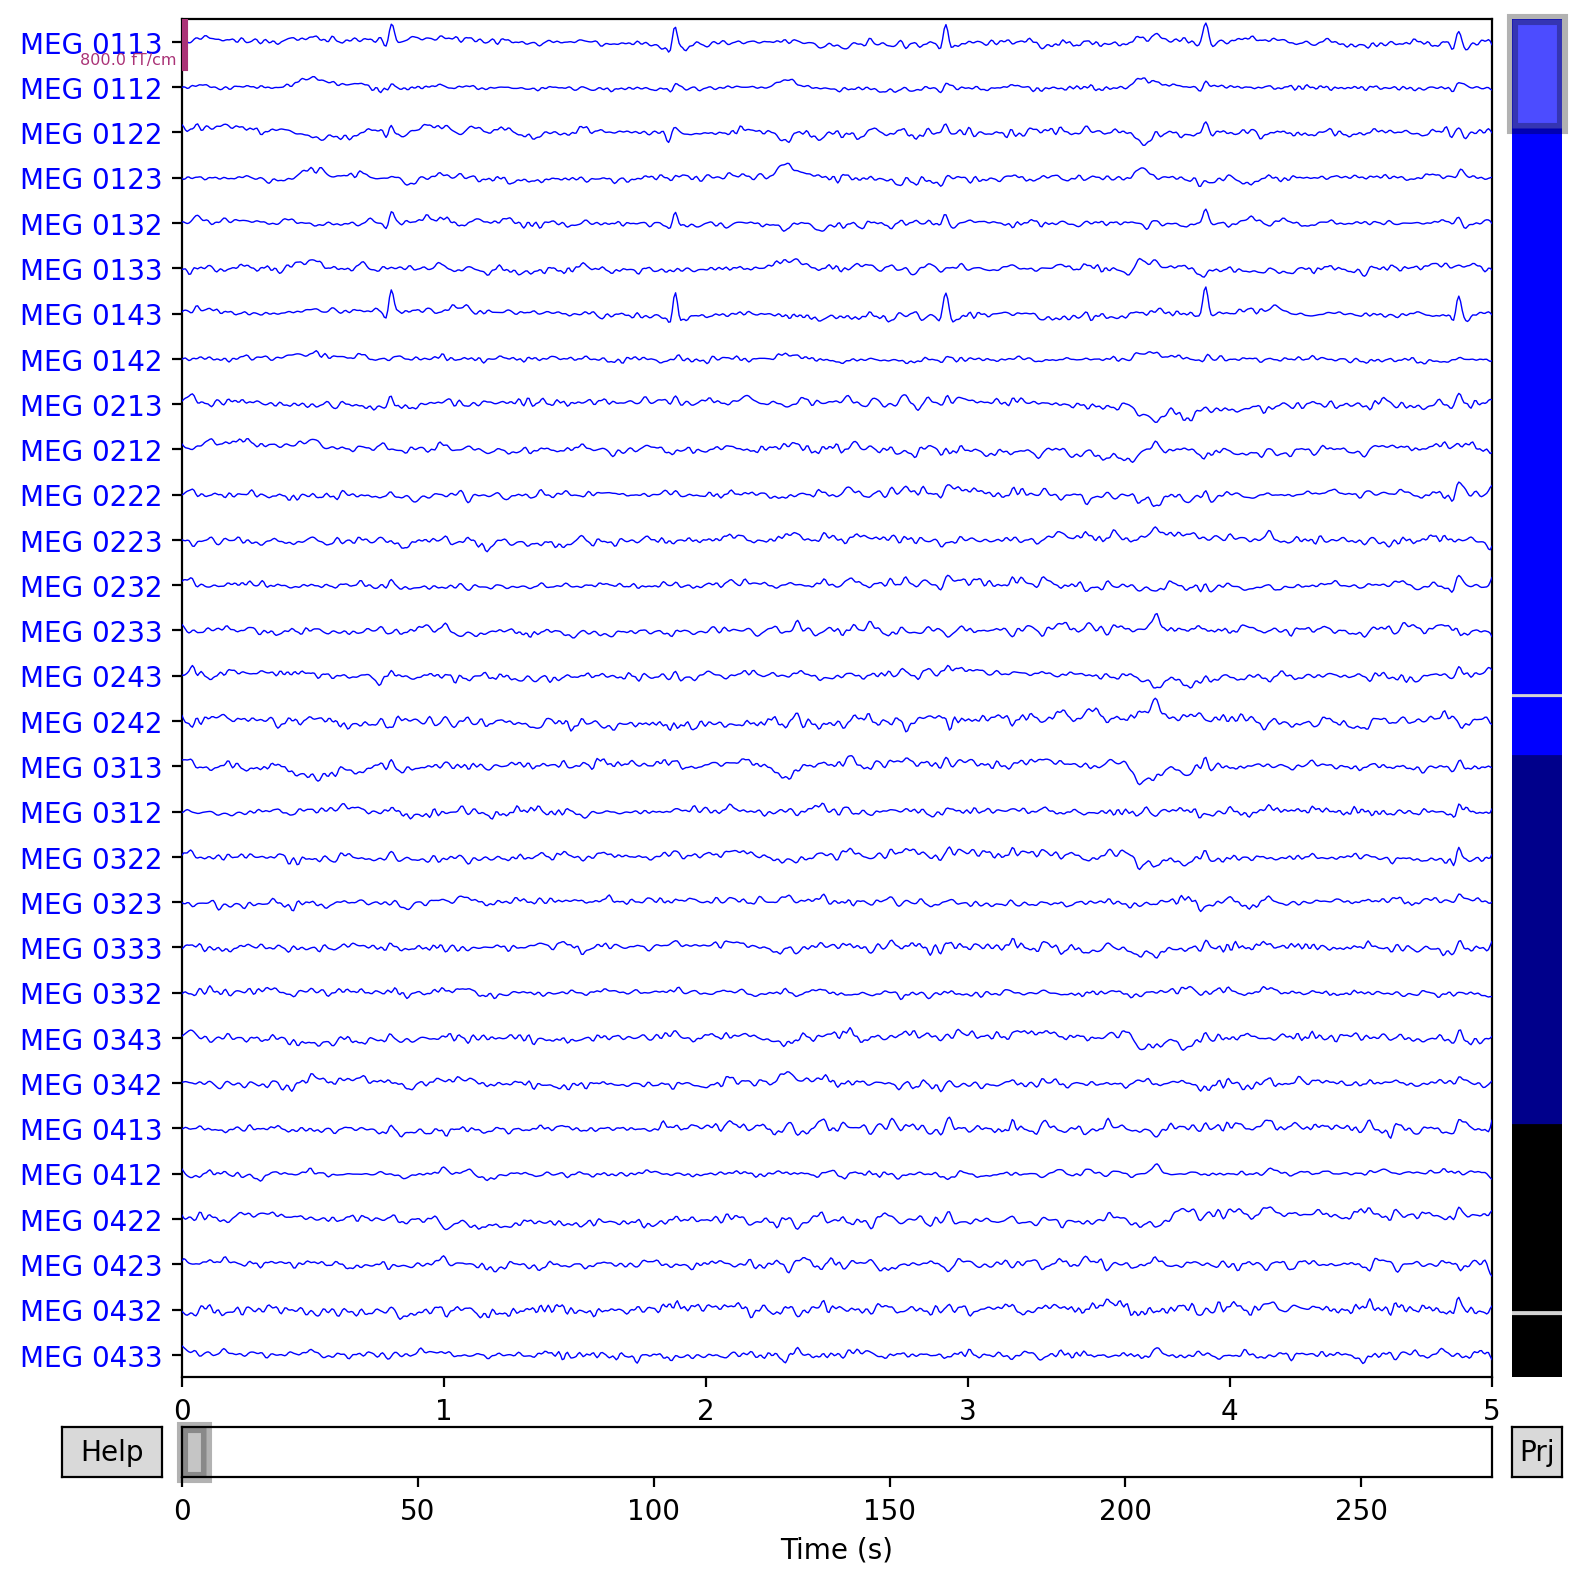

In [18]:
raw.plot(duration=5, n_channels=30)

Frequency content: We cam see that the data have been filtered between 0.1-40Hz

In [19]:
raw.compute_psd(fmax=50).plot()

Effective window size : 13.639 (s)


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 2000x1510 with 6 Axes>

## Channel selection

Select the bad channels.

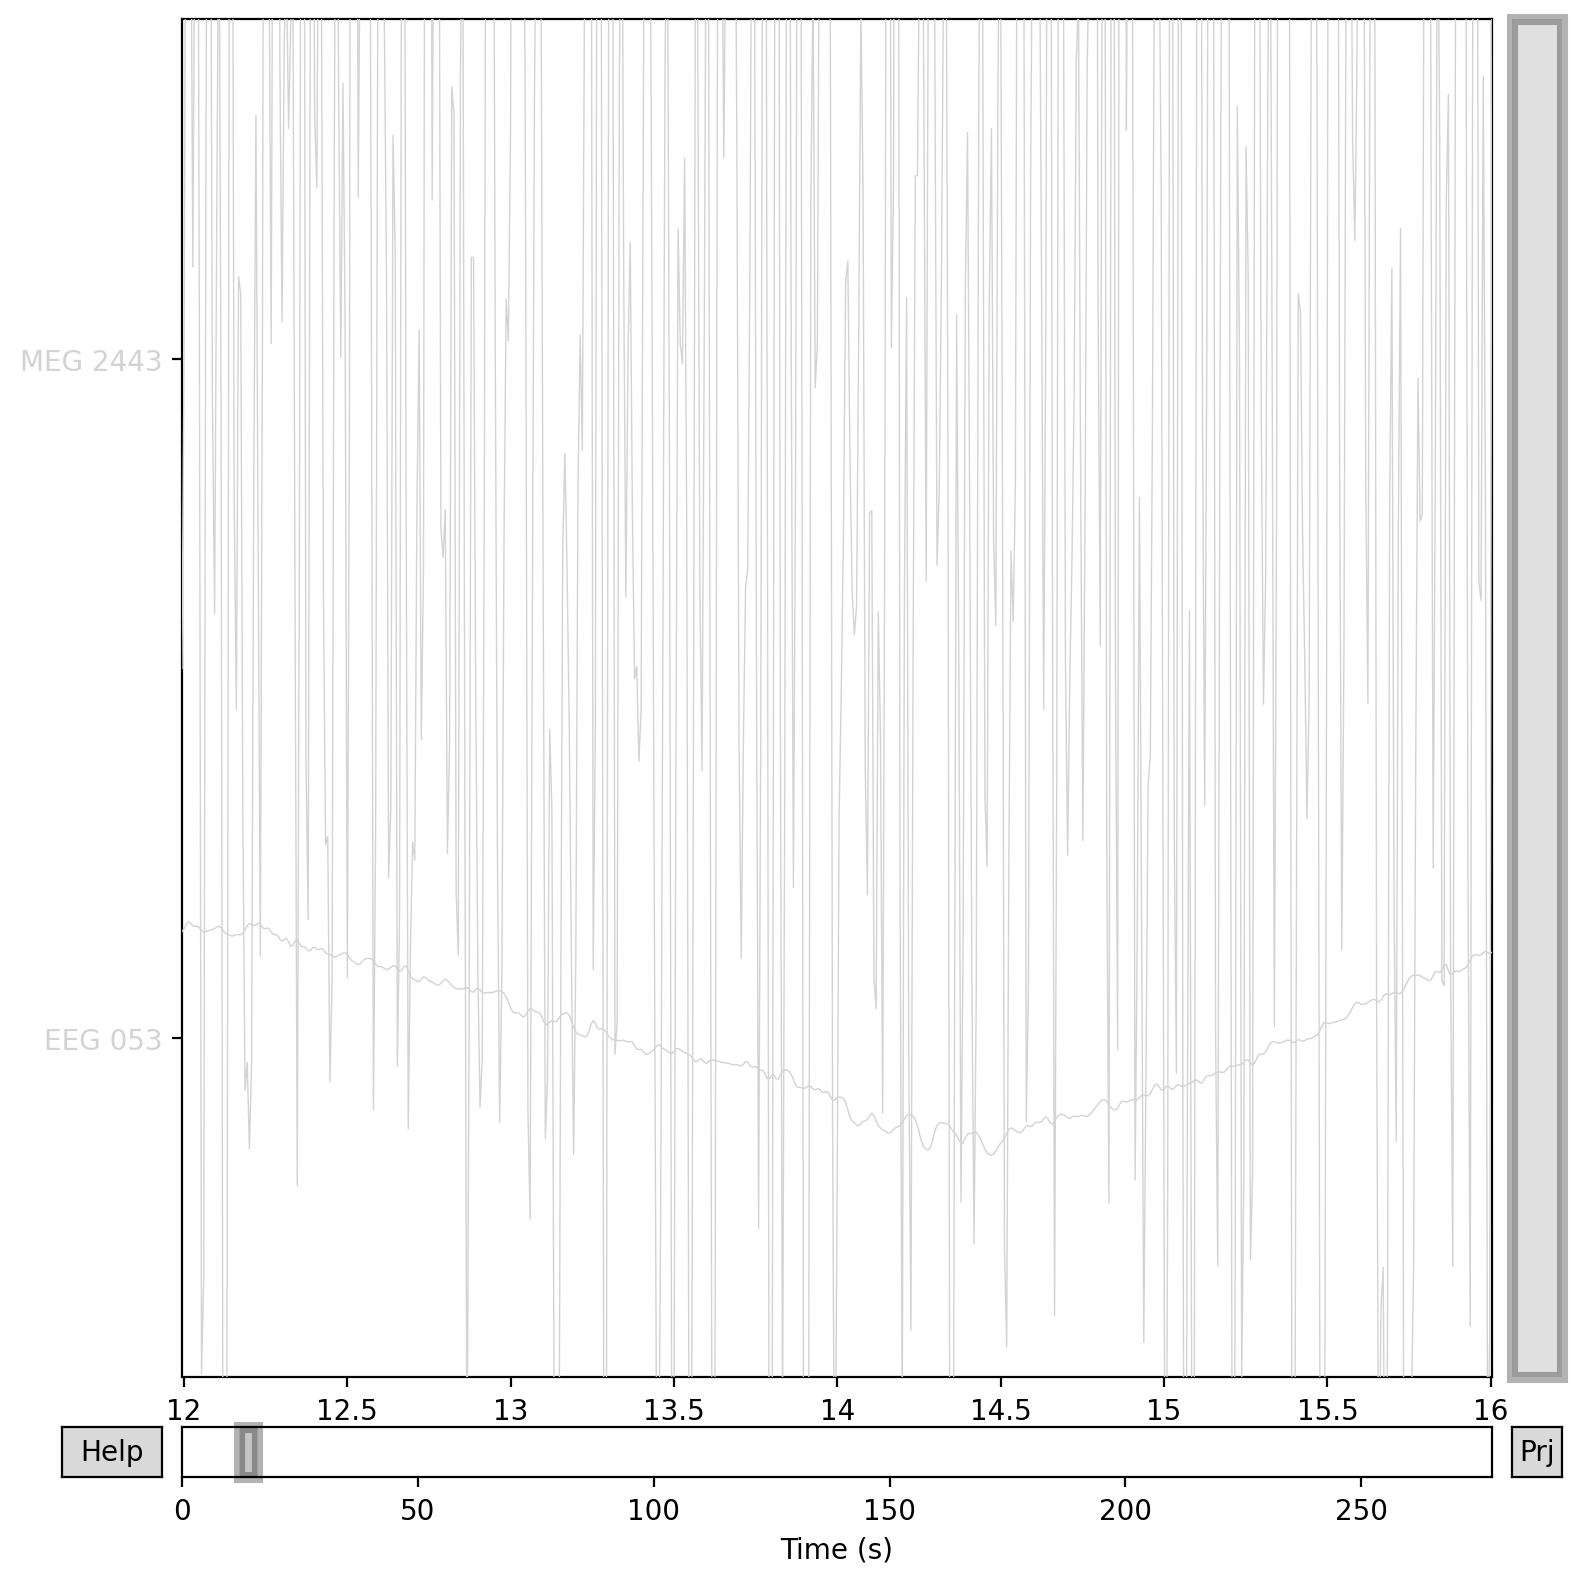

In [20]:
bad_channels = [ 'MEG 2443', 'EEG 053' ]
bad_channels_indxs = [raw.ch_names.index(ch) for ch in bad_channels]
raw.plot(order=bad_channels_indxs, start=12, duration=4)

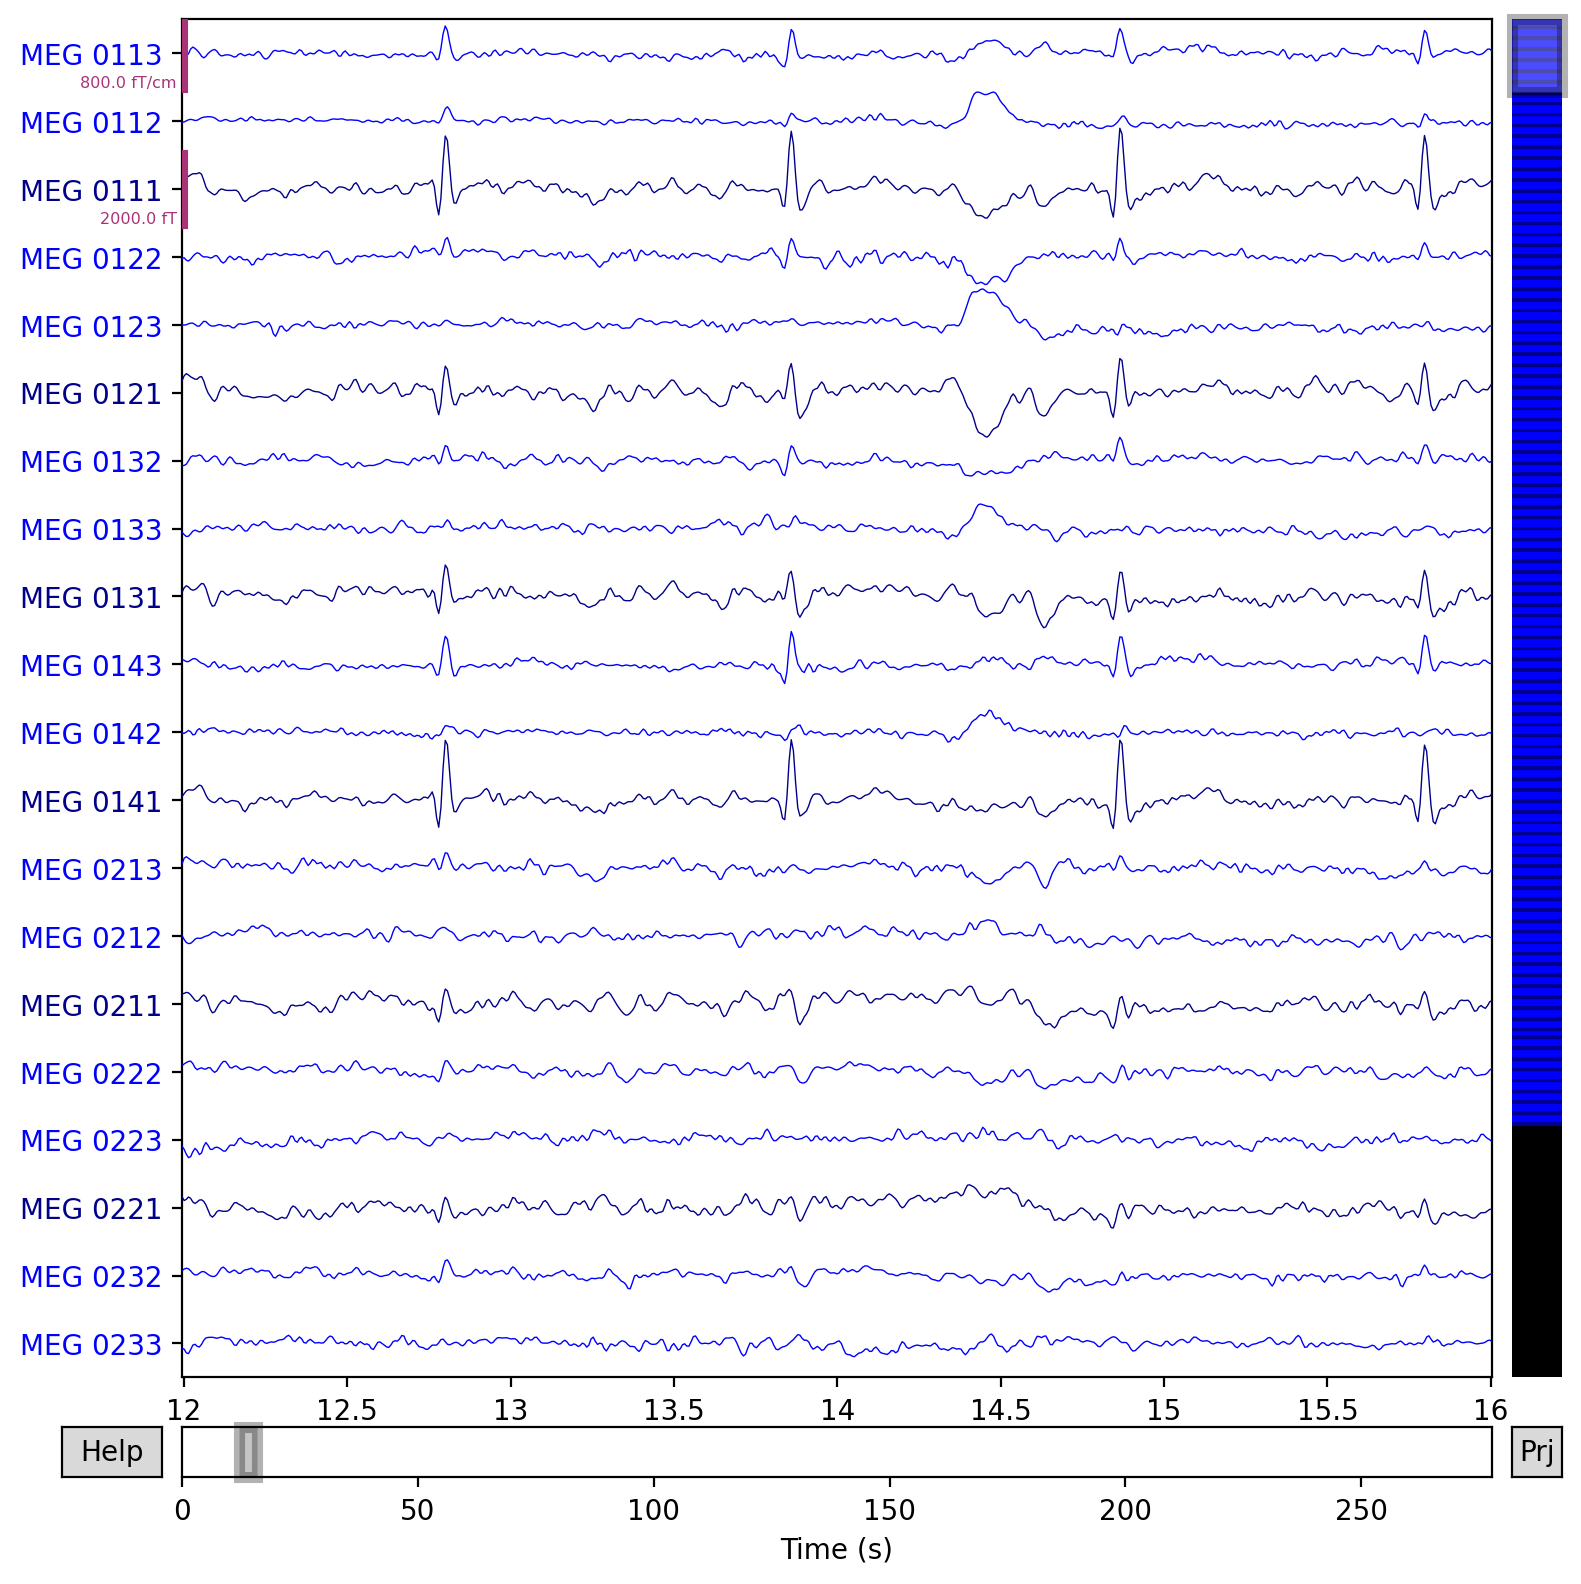

In [21]:
good_channels_indxs = [raw.ch_names.index(ch) for ch in raw.ch_names if ch not in bad_channels]
raw.plot(order=good_channels_indxs, start=12, duration=4)

## Epoching

Extract and show events

In [ ]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])  # show the first 5

Associate event numbers to the protocol events

In [ ]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

Plot various events in time

In [ ]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [19]:
reject_criteria = dict(mag=4000e-15,     # 4000 fT
                       grad=4000e-13,    # 4000 fT/cm
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

# Select an equal number of visual and auditory events.

conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']

del raw, epochs  # free up memory

Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 319 events and 106 original time points ...
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
10 bad epochs dropped
Dropped 7 epochs: 121, 195, 258, 271, 273, 274, 275


Visualize epochs on two channels

In [20]:
aud_epochs.plot_image(picks=['MEG 1332', 'EEG 021'])

Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

## Estimating evoked responses

In [21]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


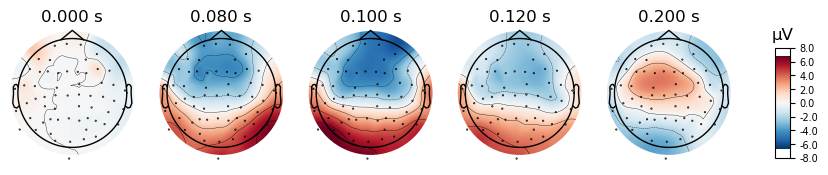

In [22]:
aud_evoked.plot_joint(picks='eeg')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


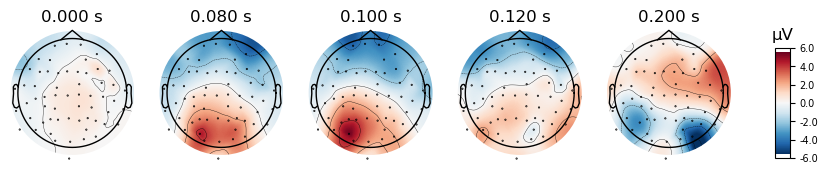

In [23]:
vis_evoked.plot_joint(picks='eeg')
vis_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


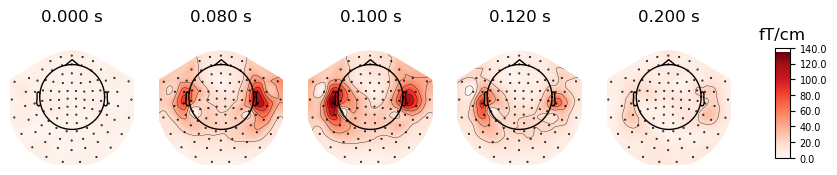

In [24]:
aud_evoked.plot_joint(picks='meg')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='mag')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='grad')

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


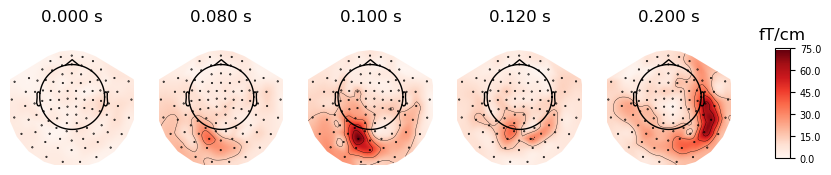

In [25]:
vis_evoked.plot_joint(picks='meg')
vis_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='mag')
vis_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='grad')

In [26]:
mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                             legend='upper left', show_sensors='upper right')

Multiple channel types selected, returning one figure per type.
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


[<Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>]